# PCA Example using Digits Dataset

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
from matplotlib import pyplot as plt

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
dataset.data.shape

(1797, 64)

In [3]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Here, we have images in dataset -> data with pixel values in 1D array. Let's convert it into 2D and view the Image (which will be a 2D matrix)

In [4]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

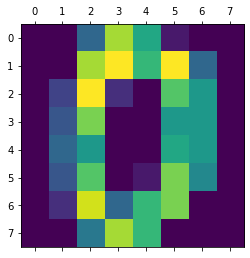

In [5]:
plt.matshow(dataset.data[0].reshape(8,8))

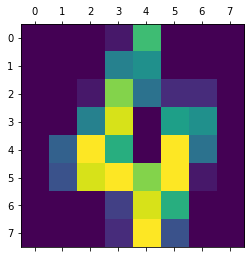

In [6]:
plt.matshow(dataset.data[4].reshape(8,8))

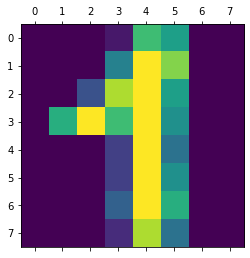

In [7]:
plt.matshow(dataset.data[47].reshape(8,8))

In [8]:
dataset.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

Let's feed the dataset.data in pandas as rows and dataset.feature_names as the columns, as they describe the pixel value in row_column name. Eg: pixel_row_column -> pixel_1_4.

In [9]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


dataset.target tells the possible value of our digit.

In [10]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

### Now, lets make a model which will be trained our digits dataset

- First, we will reduce the feature pixels which will not be contributing in training out model. <br/>
- Here, for example as you can see the image, left and right columns on the edges are completely black and have 0 values. Thus they will not be helpful or not be contibuting in our training. <br/>
- So its better to remove such features from our datasets. This is called dimensionality reduction. PCA works on this principle.

First, lets see a model before applying PCA.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df
y = dataset.target

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

### Now, we will use PCA to reduce dimension.

We will use components such that 95% of variance is retained

In [15]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
print("Before Dimentionality Reduction = ",X.shape)

X_pca = pca.fit_transform(X)
print("After Dimentionality Reduction = ",X_pca.shape)

Before Dimentionality Reduction =  (1797, 64)
After Dimentionality Reduction =  (1797, 29)


In [16]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [17]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

pca.explained_variance_ratio_ this method tells us how much each feature is contributing.

### Now, lets see a model after applying PCA.

In [18]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

### Result 1: As you can see, there was not much reduction in accuracy of the model even after we removed some features (from 64 to 29)

- Let's see what happens if we consider only 2 components.

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [21]:
X_pca

array([[ -1.2594675 ,  21.27488399],
       [  7.95760512, -20.76869215],
       [  6.99192671,  -9.95598961],
       ...,
       [ 10.8012887 ,  -6.96025857],
       [ -4.87209969,  12.42395542],
       [ -0.34438061,   6.36553861]])

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

- As we can see that both combined variances retains only 0.14 + 0.13 = 0.27 or 27% of important feature information

In [23]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

### Result 2: As you can see, there is a significant reduction in accuracy of the model as we had only considered only 2 components.

### NOTE: Doing PCA many times reduces the accuracy but computation is much lighter and that's the trade off we need to consider while building models in real life